# Navigation

---

- For DRL project 1 submission
- Blog: http://lsong.net/simple-guide-on-start-your-udacity-drl-project-local/
- YouTube: https://youtu.be/1JlWPEB8c0U
- Github: https://github.com/lll-song/p1-navigation.git


<strong>A file with the saved model weights of the successful agent, is named model.pt</strong>

Notebook that uses the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages and dependencies, and start the Unity Environment.

In [1]:
from unityagents import UnityEnvironment
import numpy as np

from matplotlib import pyplot as plt
%config Completer.use_jedi = False

from collections import namedtuple, deque
import torch

env = UnityEnvironment(file_name="Banana_Windows_x86_64/Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [2]:
# get the default brain

brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 2. Build a Deep Q-network (DQN) and plot scores

As shown in the course with the OpenAI gym in workplace, with approperate modification to fit this project.

- The implmentation is using Deep Q-Learning. Q-learning is a model-free reinforcement learning algorithm to learn quality of actions telling an agent what action to take under what circumstances. Algorithm explaination showing below is <strong>from wikipedia</strong>, to save us some time generating repearted content. Any further questions and discussion is welcome.

![title](asset/fig01.png)

In [3]:
# Deep Q-Learning function

from agent import Agent

def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995, train_mode=True, 
        model_pt_path='model.pt'):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
        train_mode (bool): if 'True' set environment to training mode        
    """
    scores = []                                                 # list containing scores from each episode
    scores_window = deque(maxlen=100)                           # last 100 scores    
    eps = eps_start                                             # initialize epsilon
    scores_average = []
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=train_mode)[brain_name] # reset environment
        state = env_info.vector_observations[0]                 # get current state        
        score = 0
        for t in range(max_t):       
            action = int(agent.act(state, eps))                  # select an action
            env_info = env.step(action)[brain_name]              # send the action to the environment
            next_state = env_info.vector_observations[0]         # get the next state
            reward = env_info.rewards[0]                         # get the reward
            done = env_info.local_done[0]                        # see if episode has finished
            agent.step(state, action, reward, next_state, done)  # learning
            state = next_state
            score += reward
            if done:                                             # exit loop if episode finished
                break 
        scores_window.append(score)                              # save most recent score to window          
        scores.append(score)                                     # save most recent score
        scores_average.append(np.mean(scores_window))
        eps = max(eps_end, eps_decay*eps)                        # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), model_pt_path)
            break
    return scores, scores_average

Episode 100	Average Score: 2.67
Episode 200	Average Score: 7.36
Episode 300	Average Score: 11.68
Episode 375	Average Score: 13.05
Environment solved in 275 episodes!	Average Score: 13.05


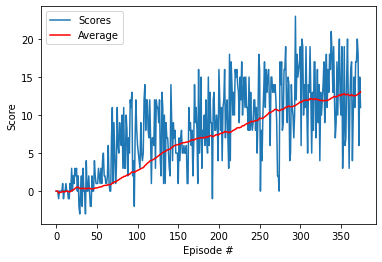

In [4]:
# run the training loop
agent = Agent(state_size=state_size, action_size=action_size, seed=0)
scores, average = dqn(n_episodes=600, eps_decay=0.98, eps_end=0.02, model_pt_path='model.pt')

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='Scores')
plt.plot(np.arange(len(scores)), average, c='r', label='Average')
plt.legend(loc='upper left');
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 3. Future work


- Comparison among implementation of a double DQN, a dueling DQN, and/or prioritized experience replay could be tested.
- Learning from pixels